In [1]:
# A script that takes in extracted OPAL results for CAMI1 datasets and makes some nice plots
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
all_rank_df = pd.read_csv('processed_results/1cami_opal_summaries/1cami_opal_summary_all_level.tsv', sep='\t', index_col=0, header=0)
genus_rank_df = pd.read_csv('processed_results/1cami_opal_summaries/1cami_opal_summary_genus_level.tsv', sep='\t', index_col=0, header=0)
species_rank_df = pd.read_csv('processed_results/1cami_opal_summaries/1cami_opal_summary_species_level.tsv', sep='\t', index_col=0, header=0)
all_rank_df['1 - (L1 error / 2)'] = 1 - (all_rank_df['L1 norm error'] / 2)
all_rank_df['1 - (UniFrac / 14)'] = 1 - (all_rank_df['Weighted UniFrac error'] / 14)
genus_rank_df['1 - (L1 error / 2)'] = 1 - (genus_rank_df['L1 norm error'] / 2)
genus_rank_df['1 - (UniFrac / 14)'] = 1 - (genus_rank_df['Weighted UniFrac error'] / 14)
species_rank_df['1 - (L1 error / 2)'] = 1 - (species_rank_df['L1 norm error'] / 2)
species_rank_df['1 - (UniFrac / 14)'] = 1 - (species_rank_df['Weighted UniFrac error'] / 14)
all_rank_df

,Purity (precision),Completeness (recall),F1 score,Jaccard index,L1 norm error,Weighted UniFrac error,Method,1 - (L1 error / 2),1 - (UniFrac / 14)
Taxy-Pro2,0.305082,0.729135,0.402454,0.285646,0.788736,8.018896,Taxy-Pro2,0.605632,0.427222
Taxy-Pro1,0.354499,0.730509,0.447244,0.332465,0.772346,10.182876,Taxy-Pro1,0.613827,0.272652
Quickr,0.288253,0.785287,0.402345,0.276270,0.892569,9.325096,Quickr,0.553715,0.333922
CLARK,0.252877,0.800542,0.355748,0.252287,0.836992,8.154753,CLARK,0.581504,0.417518
FOCUS,0.437555,0.643432,0.504394,0.387685,0.748970,10.052114,FOCUS,0.625515,0.281992
CommonKmers,0.775726,0.469663,0.564570,0.428893,0.851562,10.455989,CommonKmers,0.574219,0.253144
metalign,0.736813,0.857636,0.768791,0.667967,0.512731,8.028457,metalign,0.743634,0.426539
Metaphlan2,0.833323,0.558671,0.652550,0.533621,1.062596,10.897971,Metaphlan2,0.468702,0.221573
TIPP,0.389691,0.743814,0.481185,0.368149,0.724569,9.827967,TIPP,0.637715,0.298002
mOTU,0.636834,0.587030,0.595338,0.489143,0.995919,10.857634,mOTU,0.502041,0.224455


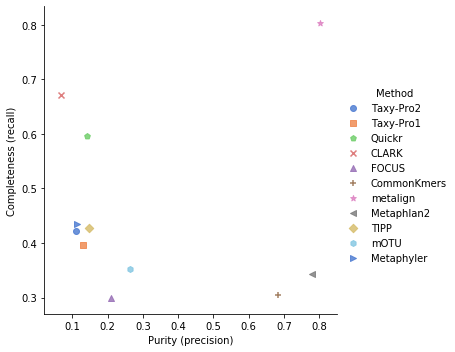

In [156]:
markers = ['o', 's', 'p', 'x', '^', '+', '*', '<', 'D', 'h', '>']
#sns.lmplot('Purity (precision)', 'Completeness (recall)', data=all_rank_df, markers=markers, fit_reg=False, hue='Method', palette='muted')
sns.lmplot('Purity (precision)', 'Completeness (recall)', data=genus_rank_df, markers=markers, fit_reg=False, hue='Method', palette='muted')
#sns.lmplot('Purity (precision)', 'Completeness (recall)', data=species_rank_df, markers=markers, fit_reg=False, hue='Method', palette='muted')

(11.0, 0)

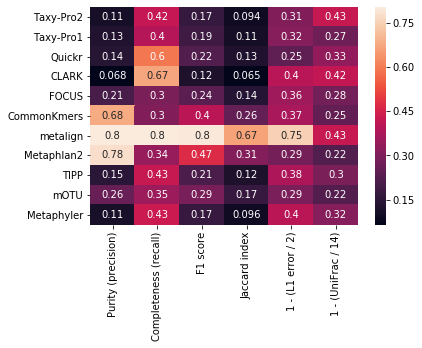

In [155]:
ax = sns.heatmap(genus_rank_df.drop(labels=['Method', 'Weighted UniFrac error', 'L1 norm error'], axis=1), annot=True)
#plt.xticks(rotation=0)
ax.set_ylim(11.0, 0)

In [3]:
per_dataset_all_f1 = pd.read_csv('processed_results/1cami_opal_summaries/1cami_opal_summary_all_level_per_dataset_f1.tsv', sep='\t', index_col=0, header=None)
per_dataset_genus_f1 = pd.read_csv('processed_results/1cami_opal_summaries/1cami_opal_summary_genus_level_per_dataset_f1.tsv', sep='\t', index_col=0, header=None)
per_dataset_species_f1 = pd.read_csv('processed_results/1cami_opal_summaries/1cami_opal_summary_species_level_per_dataset_f1.tsv', sep='\t', index_col=0, header=None)
per_dataset_all_f1

,1,2,3,4,5,6,7,8
0,,,,,,,,
Taxy-Pro2,0.437426,0.348685,0.451114,0.457985,0.463294,0.219486,0.356812,0.484834
Taxy-Pro1,0.498877,0.396032,0.512731,0.484546,0.516745,0.237769,0.414192,0.517057
Quickr,0.457033,0.340077,0.461659,0.463220,0.459768,0.227375,0.337942,0.471691
CLARK,0.374859,0.330512,0.393569,0.393907,0.393724,0.233718,0.332526,0.393166
FOCUS,0.539994,0.467776,0.554463,0.537411,0.556411,0.351827,0.474725,0.552548
CommonKmers,0.552998,0.646280,0.584174,0.548125,0.572536,0.494805,0.576454,0.541187
metalign,0.727285,0.832045,0.767580,0.754662,0.736932,0.810632,0.763246,0.757942
Metaphlan2,0.631798,0.756046,0.634583,0.627954,0.640299,0.571023,0.717130,0.641569
TIPP,0.549256,0.401938,0.557299,0.554430,0.552928,0.250392,0.423961,0.559276


In [4]:
per_dataset_all_l1 = pd.read_csv('processed_results/1cami_opal_summaries/1cami_opal_summary_all_level_per_dataset_l1.tsv', sep='\t', index_col=0, header=None)
per_dataset_genus_l1 = pd.read_csv('processed_results/1cami_opal_summaries/1cami_opal_summary_genus_level_per_dataset_l1.tsv', sep='\t', index_col=0, header=None)
per_dataset_species_l1 = pd.read_csv('processed_results/1cami_opal_summaries/1cami_opal_summary_species_level_per_dataset_l1.tsv', sep='\t', index_col=0, header=None)
per_dataset_all_l1

,1,2,3,4,5,6,7,8
0,,,,,,,,
Taxy-Pro2,0.683271,0.850549,0.677575,0.676224,0.686924,1.176354,0.875309,0.683684
Taxy-Pro1,0.676863,0.807672,0.668439,0.668220,0.678401,1.155964,0.849116,0.674095
Quickr,0.837883,0.926282,0.826257,0.848229,0.868075,1.029068,0.969344,0.835417
CLARK,0.685242,0.947463,0.700651,0.709994,0.727817,1.254623,0.942558,0.727584
FOCUS,0.637781,0.862866,0.621755,0.624824,0.658485,1.111815,0.839852,0.634382
CommonKmers,0.770910,0.890815,0.748620,0.731893,0.764139,1.317117,0.813267,0.775737
metalign,0.450536,0.602126,0.445027,0.449052,0.461417,0.556799,0.696278,0.440613
Metaphlan2,0.996427,1.048245,1.019930,1.043095,1.034613,1.393080,0.907392,1.057989
TIPP,0.636747,0.714163,0.642853,0.636491,0.660128,1.112133,0.736067,0.657973


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

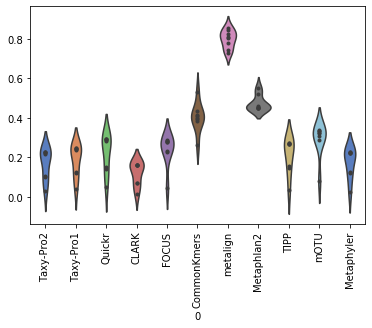

In [144]:
#sns.violinplot(data=per_dataset_all_f1.T, inner="points", palette='muted')
sns.violinplot(data=per_dataset_genus_f1.T, inner="points", palette='muted')
#sns.violinplot(data=per_dataset_species_f1.T, inner="points", palette='muted')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

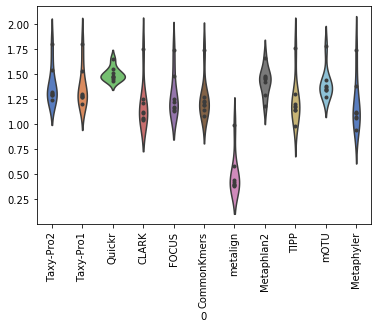

In [143]:
#sns.violinplot(data=per_dataset_all_l1.T, inner="points", palette='muted')
sns.violinplot(data=per_dataset_genus_l1.T, inner="points", palette='muted')
#sns.violinplot(data=per_dataset_species_l1.T, inner="points", palette='muted')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

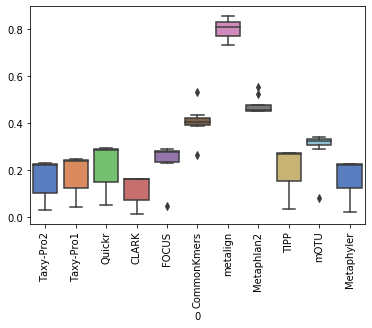

In [133]:
#sns.boxplot(data=per_dataset_all_f1, palette='muted')
sns.boxplot(data=per_dataset_genus_f1.T, palette='muted')
#sns.boxplot(data=per_dataset_species_f1, palette='muted')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

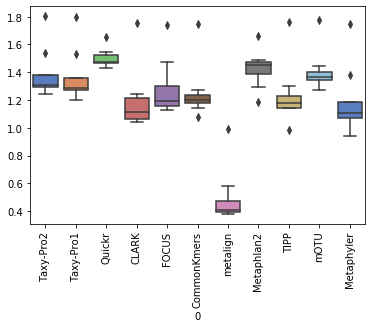

In [134]:
#sns.boxplot(data=per_dataset_all_l1, palette='muted')
sns.boxplot(data=per_dataset_genus_l1.T, palette='muted')
#sns.boxplot(data=per_dataset_species_l1, palette='muted')
plt.xticks(rotation=90)

In [5]:
tara_timing_all = pd.read_csv('processed_results/tara_oceans/timing_tara_oceans_prokaryotes_all.tsv', sep='\t', index_col=0, header=None)
tara_timing_all
#tara_timing_dcm = pd.read_csv('processed_results/tara_oceans/timing_tara_oceans_prokaryotes_dcm.tsv', sep='\t', index_col=0, header=None)
#tara_timing_dcm

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
Metalign,87,27,25,22,14,27,180,140,21,135
Kraken2,80,15,21,20,15,30,98,117,30,102
MetaPhlAn2,253,53,53,55,37,82,369,321,81,339


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

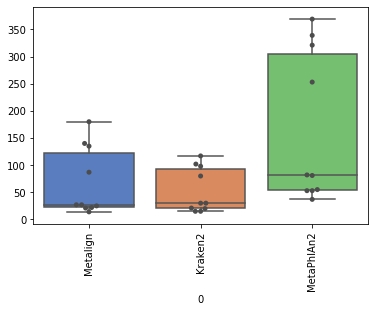

In [179]:
sns.boxplot(data=tara_timing_all.T, palette='muted')
sns.swarmplot(data=tara_timing_all.T, size=5, color=".3", linewidth=0)
#sns.boxplot(data=tara_timing_dcm.T, palette='muted')
#sns.swarmplot(data=tara_timing_dcm.T, size=5, color=".3", linewidth=0)
plt.xticks(rotation=90)